<a href="https://colab.research.google.com/github/Nekoiii/SD_Practices_colab/blob/main/img2img_sd_script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from PIL import Image

In [2]:
#%%capture
sd_path='/content/drive/MyDrive/StableDifussion/sd-scripts'
%cd '{sd_path}'
!pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 --extra-index-url https://download.pytorch.org/whl/cu117
!pip install  --upgrade -r requirements.txt
#!pip install -U --pre triton
!pip install xformers==0.0.16rc425
%cd /content

/content/drive/MyDrive/StableDifussion/sd-scripts
Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 995.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 40.1 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.2+cu118
    Uninstalling torchvision-0.15.2+cu118:
      Successfully uninstalled torchvision-0.15.2+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.0.2+cu118 requires torch==2.0.1, but you have torch 1.13.1+cu117 which is incompatible.
torchdata 0.6.1 requires torch==2.0.1, but you have torch 1.13.1+cu117

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 MB 33.9 MB/s eta 0:00:00
/content


In [3]:
#%%script false --no-raise-error
!pip install --upgrade pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0


In [4]:
!accelerate config default --mixed_precision fp16

2023-07-21 05:53:16.909763: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 05:53:17.058344: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-21 05:53:17.097716: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-21 05:53:17.897751: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

def display_images(folder, n, width, cols):
    image_files = sorted((os.path.join(folder, f) for f in os.listdir(folder) if f.endswith('.png')),
                         key=os.path.getmtime, reverse=True)[:n]
    rows = (n // cols) + (n % cols > 0)
    fig = plt.figure(figsize=(cols * width, rows * width))
    for i, image_file in enumerate(image_files):
        img = mpimg.imread(image_file)
        ax = fig.add_subplot(rows, cols, i+1)
        ax.imshow(img)
        ax.axis('off')
    plt.subplots_adjust(wspace=0.01, hspace=0.03)
    plt.show()

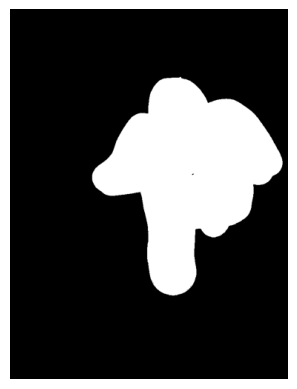

In [214]:
def show_img(img_path):
  img = Image.open(img_path).convert("RGB")
  img.thumbnail((500, 500))
  plt.imshow(img)
  plt.axis('off')
  plt.show()

show_img(mask_img_path)

In [246]:

#init_img_path = '/content/drive/MyDrive/datasets/imgs/others/inokashira-2.jpeg'
#init_img_path = '/content/drive/MyDrive/output_imgs/save/im_20230721014850_000_271041745.png'
#init_img_path = '/content/drive/MyDrive/output_imgs/save/im_20230721060154_000_342804317.png'
#init_img_path = '/content/drive/MyDrive/output_imgs/save/im_20230721060152_000_435033460.png'

#init_img_path ='/content/drive/MyDrive/output_imgs/save/im_20230721105039_000_1923062407.png'
#init_img_path ='/content/drive/MyDrive/output_imgs/save/im_20230721110725_000_1369491056.png'
#init_img_path ='/content/drive/MyDrive/output_imgs/save/im_20230721123034_000_1763311595.png'
init_img_path ='/content/drive/MyDrive/output_imgs/save/im_20230721140203_000_1488721381.png'

mask_img_path='/content/drive/MyDrive/datasets/imgs/others/inokashira-3-step-2-mask.png'
guide_img_path='/content/drive/MyDrive/datasets/imgs/others/inokashira-2-guide.png'


In [243]:
#pretrained_model_name_or_path='/content/drive/MyDrive/StableDifussion/models/anything-v4.5-pruned-fp16.ckpt'
pretrained_model_name_or_path='/content/drive/MyDrive/StableDifussion/models/Lora/ydenV3Trainfix_ydenT.safetensors'

#used_model='/content/drive/MyDrive/StableDifussion/models/Lora/ydenV3Trainfix_ydenT.safetensors'
#used_model='/content/drive/MyDrive/StableDifussion/models/Lora/bg/fantasyWorld_v1.safetensors'
#used_model='/content/drive/MyDrive/StableDifussion/models/Lora/bg/ghibliStyleMix_v10.ckpt'

used_model='/content/drive/MyDrive/StableDifussion/models/Lora/bg/Background_halation.safetensors'
#used_model='/content/drive/MyDrive/StableDifussion/models/Lora/Seraphim.safetensors'

control_net_model_path='/content/drive/MyDrive/sd/stable-diffusion-webui/models/ControlNet/control_sd15_canny.pth'

negative_prompt='bad hands, bad quality'
images_per_prompt=4


outdir='/content/drive/MyDrive/output_imgs/'

2023-07-21 14:09:08.247975: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-21 14:09:08.398344: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-21 14:09:08.439373: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-07-21 14:09:09.269015: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

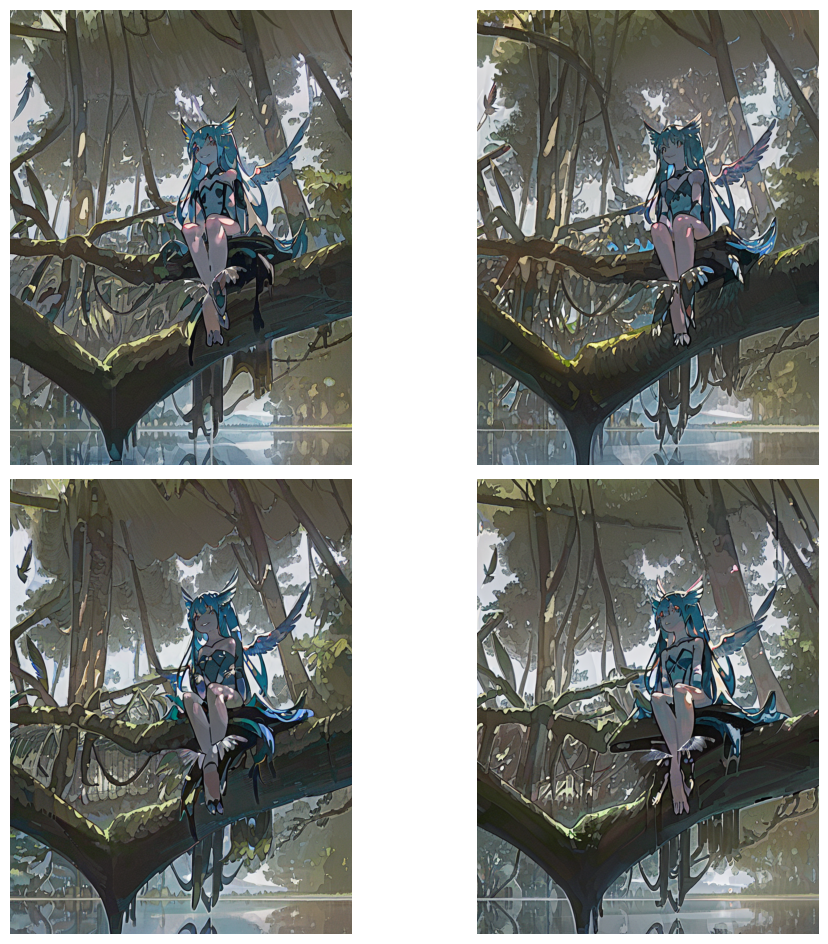

In [245]:
# https://github.com/kohya-ss/sd-scripts/blob/main/gen_img_diffusers.py
# https://github.com/kohya-ss/sd-scripts/blob/0cfcb5a49cf813547d728101cc05edf1a9b7d06c/docs/gen_img_README-ja.md?plain=1#L228


''' ***注：Lora 和 mask_path 一起用会报错！！！！'''
# Lora
'''
  --network_module networks.lora \
  --network_weights  '{used_model}' \
  --network_mul 0.8 \
  '''
# img2img
'''
  --image_path '{init_img_path}' \
  --strength 0.55 \
'''
# mask
'''
  --mask_path '{mask_img_path}' \
'''
# guide img
'''
  --control_net_models '{control_net_model_path}' \
  --control_net_weights 1.0  \
  --guide_image_path '{guide_img_path}' \
  --control_net_ratios 1.0 --interactive \
'''
W=768
H=1024
size_scale=1


#prompt='best quality, masterpiece, no humans,Tree trunk on the lake surface, dreamy,vivid,bright-coloured,small White bluebells,fantasy, fairy tale, Sparkles  <lora:halation-noiseoffset-locon-32-000006:1>'
#prompt='curved tree trunk,1girl, sitting on the curve of tree trunk,on lake surface,lying,Half leaning,2 feets,early morning,gorgeous,Angle from below,bright,wings, feathers,angel,fantasy,small White bluebells,Sparkles <lora:Seraphim-LOHA:1>'
#prompt='High brightness,curved tree trunk,1girl,angel,angel with wings, huge wings, ((((wings)))),long hairs ,blue theme,feathers,sitting on the curve of tree trunk,on lake surface,early morning,dreamy,(((bright))),light,cinematic light，Seraphim <lora:Seraphim:1>'
#prompt='early morning,high brightness,1girl,Angle from below,angel,light smile,grin,looking afar,looking to the side,beautiful legs,slim legs,beautiful eyes,sitting on the curve of tree trunk,on lake surface,huge wings,big wings, ((((wings)))),long hairs ,feathers'
prompt='Harmonious tone,low contrast,early morning,1girl,Angle from below,angel,light smile,grin,looking afar,looking to the side,sitting on the curve of tree trunk,on lake surface, ((((wings))))feathers'

#prompt='best quality, masterpiece,Shiny crystal,light,early morning , no humans,clear lake,wide lake, reeds, dreamy,vivid,bright-coloured,small White bluebells,fantasy, fairy tale, Sparkles  <lora:halation-noiseoffset-locon-32-000006:1>'
#prompt='close to camera,(((zoom in))),close,1girl,beside camera, (stands in the clear lake),(Above thighs),standing,feature article,angel,wings,(Character close-up),dress,feathers,nearby,close-up,from below,(best shadow),reeds, beautiful detailed eyes, cinematic light,'
#prompt='a cluster of reeds on the side ,high resolution, 1girl,beautiful face,friendly, (stands in the clear lake),(Above thighs),(Legs under water surface),(legs in the water),standing,angel,wings,feathers,dress,brilliancy,bright-coloured,blue theme '
#prompt='lovely,innocent face,beautiful eyes'


!python /content/drive/MyDrive/StableDifussion/sd-scripts/gen_img_diffusers.py \
  --ckpt '{pretrained_model_name_or_path}' \
  --seed  1009 \
  --n_iter 1 \
  --scale 8 \
  --steps 200 \
  --outdir  '{outdir}' \
  --prompt '{prompt}' \
  --xformers \
  --W '{int(W * size_scale)}' \
  --H '{int(H * size_scale)}' \
  --sampler k_euler_a \
  --max_embeddings_multiples 3 \
  --clip_skip 1 \
  --batch_size 1 \
  --images_per_prompt '{images_per_prompt}' \
  --image_path '{init_img_path}' \
  --strength 0.25 \
  --bf16 \
  --network_module networks.lora \
  --network_weights  '{used_model}' \
  --network_mul 0.9 \
  #--mask_path '{mask_img_path}' \
  #--control_net_models '{control_net_model_path}' \
  #--control_net_weights 1.0  \
  #--guide_image_path '{guide_img_path}' \
  #--control_net_ratios 1.0 --interactive \
  #--mask_path '{mask_img_path}' \
  #--bf16 \

display_images(outdir, n=images_per_prompt, width=6, cols=2)